# MNIST-keras
- 케라스를 이용한 MNIST

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC4/blob/main/gg-59-MNIST_keras.ipynb"><img src="https://github.com/swkim01/DSAC4/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC4/blob/main/gg-59-MNIST_keras.ipynb"><img src="https://github.com/swkim01/DSAC4/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

## 데이터 로드

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## MNIST 이미지 확인 및 데이터 전처리

Duplicate key in file PosixPath('/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  UnDotum')
Duplicate key in file PosixPath('/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 251 ('font.family:  NanumGothic')
Duplicate key in file PosixPath('/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/matplotlibrc'), line 403 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


<function matplotlib.pyplot.show(close=None, block=None)>

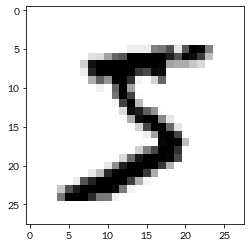

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [4]:
#train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.reshape(train_images.shape[0], 784)
train_images = train_images.astype('float32')/255

#test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.reshape(test_images.shape[0], 784)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## MLP 로 구현(케라스 사용)

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_dim=784))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


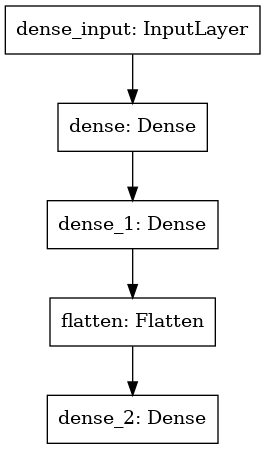

In [6]:
# plot the model
keras.utils.plot_model(model, "my_first_model.png")

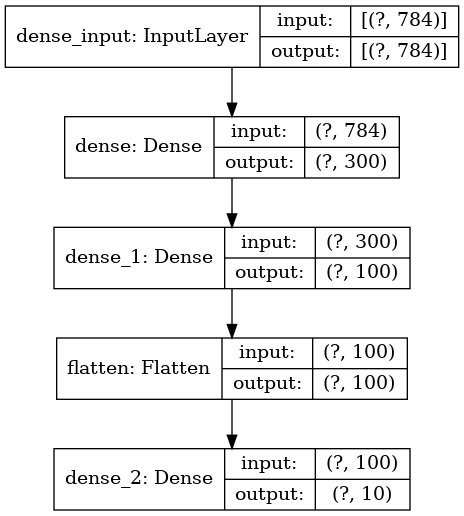

In [7]:
# optionally, display the input and output shapes of each layer in the plotted graph:

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [8]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [9]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# model callbacks
MODEL_DIR = './mnist_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                    epochs=20, batch_size=64, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.10723, saving model to ./mnist_model/01-0.1072.hdf5

Epoch 00002: val_loss improved from 0.10723 to 0.08977, saving model to ./mnist_model/02-0.0898.hdf5

Epoch 00003: val_loss did not improve from 0.08977

Epoch 00004: val_loss did not improve from 0.08977

Epoch 00005: val_loss did not improve from 0.08977

Epoch 00006: val_loss did not improve from 0.08977

Epoch 00007: val_loss improved from 0.08977 to 0.08882, saving model to ./mnist_model/07-0.0888.hdf5

Epoch 00008: val_loss did not improve from 0.08882

Epoch 00009: val_loss did not improve from 0.08882

Epoch 00010: val_loss did not improve from 0.08882

Epoch 00011: val_loss did not improve from 0.08882

Epoch 00012: val_loss did not improve from 0.08882

Epoch 00013: val_loss did not improve from 0.08882

Epoch 00014: val_loss did not improve from 0.08882

Epoch 00015: val_loss did not improve from 0.08882

Epoch 00016: val_loss did not improve from 0.08882

Epoch 00017: val_loss

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.9806
test_acc =  0.9805999994277954


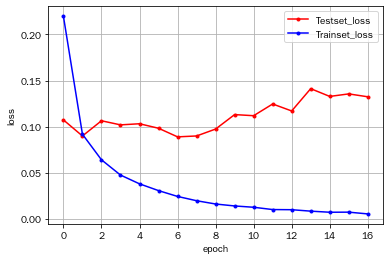

In [11]:
# loss
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## CNN 모델 생성

In [12]:
from keras import layers
from keras import models
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

## 훈련

In [13]:
import os
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

MODEL_DIR = './mnist_cnn_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./mnist_cnn_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [14]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=20, batch_size=64, verbose=0,
                    callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05046, saving model to ./mnist_cnn_model/01-0.0505.hdf5

Epoch 00002: val_loss improved from 0.05046 to 0.03707, saving model to ./mnist_cnn_model/02-0.0371.hdf5

Epoch 00003: val_loss did not improve from 0.03707

Epoch 00004: val_loss improved from 0.03707 to 0.02825, saving model to ./mnist_cnn_model/04-0.0283.hdf5

Epoch 00005: val_loss did not improve from 0.02825

Epoch 00006: val_loss improved from 0.02825 to 0.02746, saving model to ./mnist_cnn_model/06-0.0275.hdf5

Epoch 00007: val_loss improved from 0.02746 to 0.02622, saving model to ./mnist_cnn_model/07-0.0262.hdf5

Epoch 00008: val_loss improved from 0.02622 to 0.02475, saving model to ./mnist_cnn_model/08-0.0247.hdf5

Epoch 00009: val_loss did not improve from 0.02475

Epoch 00010: val_loss did not improve from 0.02475

Epoch 00011: val_loss did not improve from 0.02475

Epoch 00012: val_loss did not improve from 0.02475

Epoch 00013: val_loss did not improve from 0.02475

Epo

In [15]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_acc = ',test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9926
test_acc =  0.9926000237464905


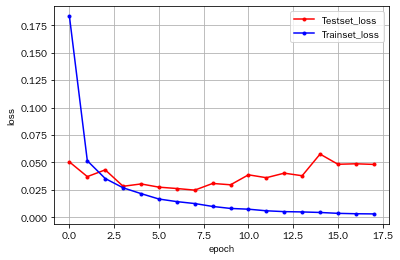

In [16]:
# loss
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()